# importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# reading from the sales csv Data file

In [15]:
df=pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# renaming column names with spaces replacing the spaces with underscore(_)

In [6]:
df.rename(columns={'Transaction ID':'Transaction_ID','Customer ID':'Customer_ID','Product Category':'Product_Category','Price per Unit':'Unit_price','Total_Amount':'Total'},inplace=True)


In [8]:
df.head(3)

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Unit_price,Total,Total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30


# Droping one total column since we have two

In [ ]:
df=df.drop(['Total'],axis=1)

In [12]:
df.head(3)

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Unit_price
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30


# Creating some additional columns namely Year, month and Total_Sales

In [ ]:
#year column comes from operations on the Date column
df['Year']=df['Date'].astype(str).apply(lambda x:x.split("-")[0])
#month's column
df['Month']=df['Date'].astype(str).apply(lambda y:y.split("-")[1])
#Total sales column results from finding the product of Unit_price and The quantity sold
df['Total_sales']=df['Quantity']*df['Unit_price']
df.head(3)

# Let's now start answering some questions arising from the Retail sales

# Question one::::Which product category has most of the customers being Men?

In [27]:
#list of product categories
categories=df['Product_Category'].unique()
#list storing male category buyers
male_buyers_list=[]
#first looping through the products categories
for category in categories:
    category_male_sales=f"{category}_male_sales"
    category_male_sales=0
    for i in range(len(df)):
        if df.loc[i].Product_Category==category and df.loc[i].Gender=='Male':
            category_male_sales+=1
    print(f"{category} male buyers :: {category_male_sales}")
    male_buyers_list.append(category_male_sales)


Beauty male buyers :: 141
Clothing male buyers :: 177
Electronics male buyers :: 172


Text(0.5, 1.0, 'Male Customers as per Product categories')

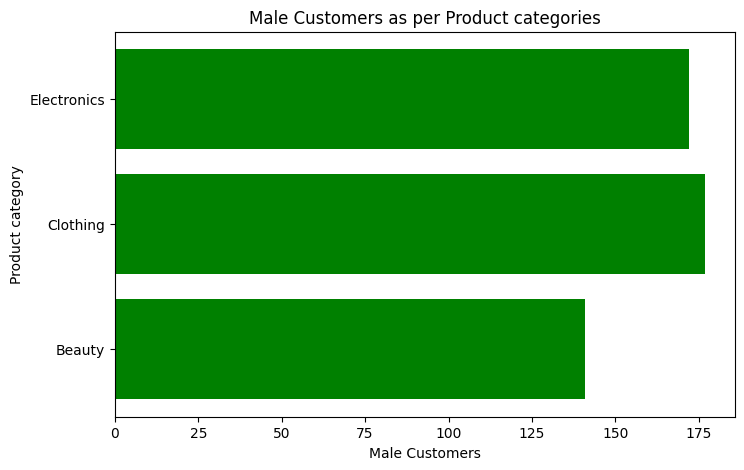

In [29]:
#visualising my findings using a bargraph
plt.figure(figsize=(8,5))
plt.barh(categories,male_buyers_list,color="green")
plt.xlabel("Male Customers")
plt.ylabel("Product category")
plt.title("Male Customers as per Product categories")

# Task 2::How Does customer Gender influence their purchasing behaviour?

In [34]:
#Finding customer Genders
genders=df['Gender'].unique()
#A list storing Gender based total sales
gender_total_list=[]
#looping through the genders list 
for gender in genders:
    #variable to store each gender total sales amount 
    gender_total_sales=f"{gender}_total_sales"
    gender_total_sales=0
    #looping through the entire Dataframe
    for i in range(len(df)):
        if df.loc[i].Gender==gender:
            gender_total_sales+=df.loc[i].Total_sales
    gender_total_list.append(gender_total_sales)
    print(f"{gender} total sales:: {gender_total_sales}")
    total_sales+=gender_total_sales


Male total sales:: 223160
Female total sales:: 232840


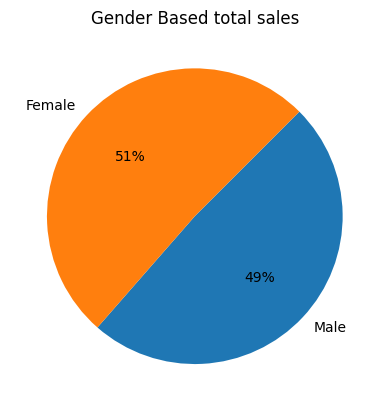

In [35]:
#vusualising my findings using a piechart
sizes=gender_total_list
plt.pie(
    sizes,
    labels=genders
    ,autopct='%1.f%%',counterclock=False,startangle=45)
plt.title("Gender Based total sales")
plt.show()